# Hotel booking Analysis

In [1]:
# country로 컨트리별로 얼마나 예약했는지 동적시각화 마지막에 해보기

- 데이터 출처 : <a href='https://www.kaggle.com/jessemostipak/hotel-booking-demand'>Kaggle의 Hotel_booking demand 데이터</a>



- 데이터 종류 : Hotel 예약정보 데이터(데이터 변수에 대한 정보는 1.1 Data field목차 참고)



- 문제상황 : 마케팅부서에서 호텔 예약 매출 향상을 목표로 하는 마케팅 전략을 수립하기 위해 데이터 부서에게 인사이트를 도출 업무협조를 요청. 전산 부서로부터 여러가지 예약 정보를 담고 있는 데이터를 제공해달라고 협조 요청후 데이터를 인계받은 상태.



- 문제정의 : 가장 핵심적인 지표는 매출의 기록 여부를 당락짓는 **'예약 취소'** 지표에 주목해야 함.

    * 호텔 종류(Resort/City)별로 월, 요일에 가장 예약을 많이하는지 가설 설정(단, 예약을 다시 취소한 것까지 고려해야 함)
        * ``가설 : 여행 성수기인 12-2월/7-8월, 그리고 주말이 껴있는 날짜에 예약이 가장 많을 것이다.``
        * 이유 : 일반적으로 알려진 여행 성수기가 여름방학, 겨울방학, 연초, 연말이고 주말에는 대부분의 직장인이 휴가이기 때문이다.
    * 예약 보증금을 얼마를 넣는지에 따라 예약을 취소하는지에 대한 가설 설정
        * ``가설 : 보증금을 조금 넣을수록 예약 취소를 할 가능성이 많을 것이다.``
        * 이유 : 개인적인 경험에서 도출된 가설인데, 분석가 본인이 유럽여행을 계획할 때 숙소를 부킹할 때 보증금을 최대한 조금 넣어놓는 것이 좋았다. 왜냐하면 정해진 여행 예산이 있었고 보증금이 많으면 정해진 예산을 금방 차지할 것 같은 심리적인(?)요소가 작용했었기 때문이다.
    * 투숙객 유형에 따라 예약을 얼마나 취소하는지에 대한 가설 설정
        * ``가설 : 짧은 기간동안 투숙하는(Transient) 투숙객들의 취소 가능성이 많을 것이다.``
        * 이유 : Transient 투숙객들은 보통 출장과 같은 비즈니스 목적으로 부킹할 가능성이 높다. 그래서 투숙객들의 업무 일정 변경이나 장소변경 등이 일반 투숙객들보다는 빈번하게 발생할 것이므로 이와 같은 가설을 설정했다.

## Data field 

- hotel : Resort Hotel/City Hotel(binary)
- is_canceled : 예약(booking)이 취소됬으면 1, 취소되지 않았으면 0
- lead_time : PMS로 들어와 예약한 날짜와 실제 호텔에 도착한날까지 경과한 시간
    * PMS : <a href='https://www.oracle.com/kr/industries/hospitality/what-is-hotel-pms.html'>호텔 자산 관리 시스템(PMS)</a>
- arrival_date_year : 호텔에 도착했을 당시의 연도
- arrival_date_month : 호텔에 도착했을 당시의 월
- arrival_date_week_number : 호텔에 도착했을 당시의 연도로부터(해당 연도 1월 첫째주부터 시작해서) 몇 주째인지
- arrival_date_day_of_month: 호텔에 도착했을 당시가 몇 일인지(1일,2일..31일)
- stays_in_weekend_nights : 호텔에서 머무르거나 예약했던 주말(토요일 또는 일요일) 수
- stays_in_week_nights : 호텔에서 머무르거나 예약했던 평일 수
- adults : 투숙객 중 어른 수
- children : 투숙객 중 아이들 수
- babies : 투숙객 중 아기 수
- meal : 예약된 식사 유형
    * Undefined : 식사 없음
    * SC : 식사 없음
    * BB : 조식만 있음
    * HB : 조식과 다른 시간대 식사(보통 석식 추가)
    * FB : 조식, 중식, 석식
- country : 투숙객 국적
- market_segment : 예약한 유형
    * Direct : 직접 예약
    * Corporate : 기업에서 예약
    * Online TA : 온라인으로 여행 업체가 예약
    * Offline TA/TO : 오프라인으로 여행업체/여행 가이드가 예약
    * Complementary : Complimentary의 오타라면 무료 예약
    * Groups : 단체로 예약
    * Undefined : 미정
    * Aviation : 항공사를 통해 예약
- distribution_channel : 예약을 할 수 있는 플랫폼(채널)
    * Direct : 직접
    * Corporate : 기업을 통해
    * TA/TO : 여행업체/여행 가이드
    * Undefined : 미정
    * <a href='https://en.wikipedia.org/wiki/Global_distribution_system'>GDS</a>(글로벌 배포 시스템은 주로 항공사, 호텔, 렌터카 회사 및 여행사와 같은 여행 업계 서비스 제공 업체 간의 거래를 가능하게하는 회사가 소유하거나 운영하는 전산화 된 네트워크 시스템)
- is_repeated_guest : 2번 이상 예약한 손님(1이면 중복손님, 0이면 최초손님)
- previous_cancellations : 현재 예약이전에 과거에 취소했던 예약 수
- previous_bookings_not_canceled : 현재 예약이전에 취소하지 않았던 예약 수
- reserved_room_type : 예약한 룸의 코드
    * 자세한 코드가 아닌 익명화 의무로 인해 간단한 코드로 표출함
- assigned_room_type : 실질적으로 배정된 룸의 코드
    * overbooking이나 고객의 요구로 바뀌기도 함
    * 자세한 코드가 아닌 익명화 의무로 인해 간단한 코드로 표출함
- booking_changes : PMS에서 예약하고 체크인 또는 취소할 때까지 예약에 대한 변경사항 횟수
- deposit_type : 예약 보증금
    * No Deposit : 보증금 넣지 않음
    * Non Refund : 예약비의 100%를 보증금으로 넣음
    * Refundable : 예약비의 100%미만의 일정 금액만을 보증금으로 넣음
- agent : 예약을 대행한 여행업체의 ID
- company : 예약을 한 기업의 ID(익명화 처리됨)
- days_in_waiting_list : 예약이 확정될 때까지 걸린 일수
- customer_type : 예약의 유형
    * Contract 
    * Group
    * Transient
    * Transient-Party
- adr : 숙박 예약의 총 합을 숙박 일수의 총 합으로 나눈 일일 비율
- required_car_parking_spaces : 고객들이 요구한 자가용 주차장의 수
- total_of_special_requests : 고객들이 요구한 특별한 요구(트윈 베드나 고층으로 해달라는 요구 등)
- reservation_status : 예약의 마지막 상태
    * Canceled : 고객이 예약을 취소함
    * Check-out : 고객이 체크인 한 후 숙박을 한다음 체크아웃한 상태
    * No-Show : 고객이 체크인하지 않았고 호텔에게 체크인 하지 않은 이유를 통보한 상태
- reservation_status_date : 에약의 마지막 상태가 기록된 날짜
    * 이 변수와 reservation_status변수와 함께 예약이 언제취소됬고 고객이 언제 체크아웃했는지 추론할 수 있음

## Cleansing data

In [2]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data')

In [35]:
hotel = pd.read_csv('hotel_bookings.csv', encoding='utf-8')
hotel.shape

(119390, 32)

In [4]:
pd.options.display.max_columns=33
hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


<AxesSubplot:>

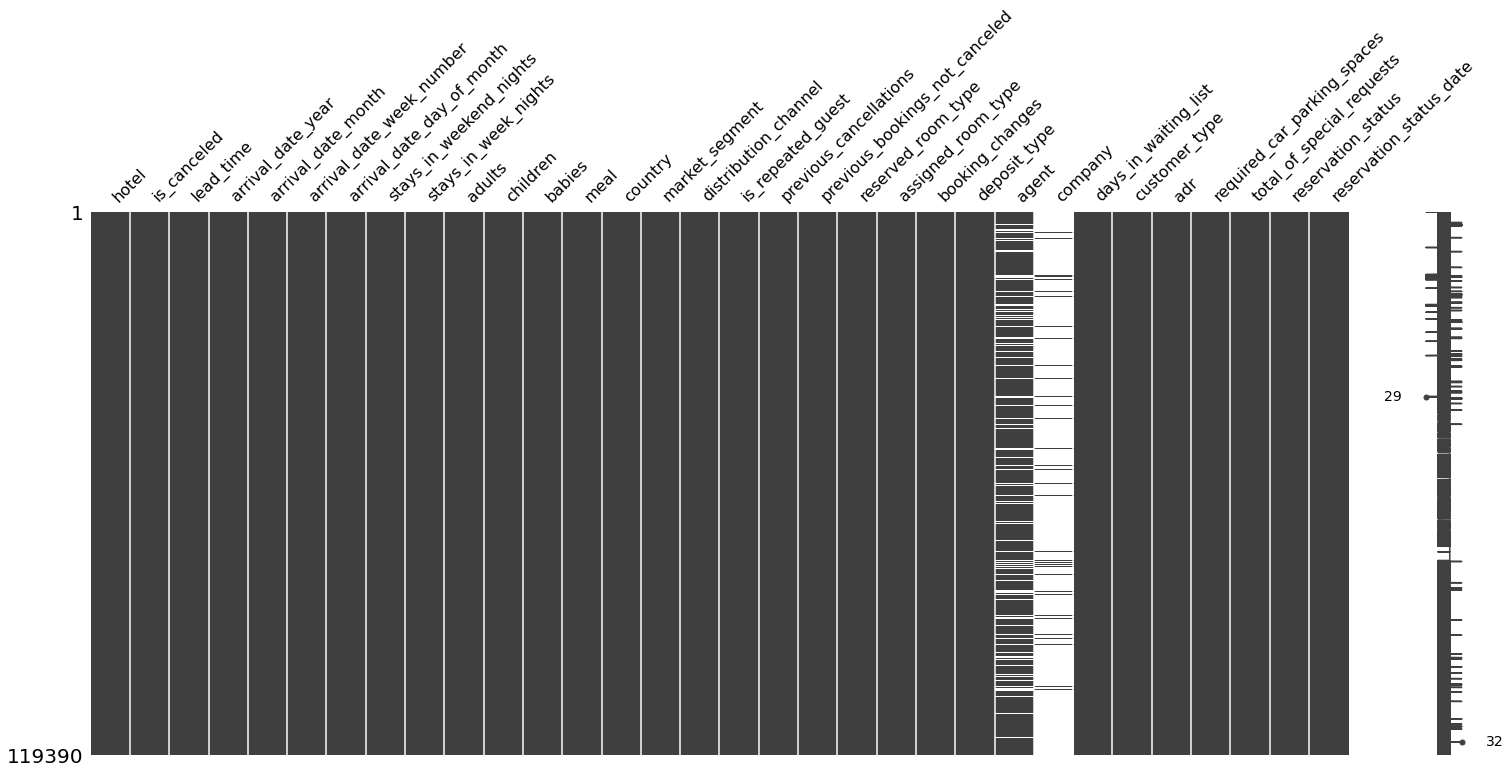

In [5]:
# feature가 많기 때문에 결측치 존재여부를 대략적으로 보기 위해 결측치 시각화
import missingno as msno
msno.matrix(hotel, figsize=(25,10))

In [6]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- 결측치가 있는 변수들
    * agent : 예약을 대행한 여행업체의 ID
    * company : 예약을 한 기업의 ID(익명화 처리됨)
    * country : 예약한 투숙객의 국적
    * children : 예약한 투숙객의 아이들 수
- 하지만 결측치가 있는 변수들 중 agent, company, country는 우리가 설정한 문제를 해결하는 데 유용하지 않은 변수이다.
- children은 결측치가 4개 이므로 해당 결측치를 0으로 대체해도 무방
- 따라서, ``결측치가 존재하는 두 개의 변수를 삭제하기로 결정``

In [7]:
# 결측치가 존재하는 변수들 삭제
hotel = hotel.drop(['agent','company','country'], axis=1)
hotel['children'] = hotel['children'].fillna(0)
hotel.isnull().sum().sum()

0

## 첫 번째 가설 검정

- 호텔 종류(Resort/City)별로 월, 요일에 가장 예약을 많이하는지 가설 설정(단, 예약을 다시 취소한 것까지 고려해야 함)
- 가설 : 여행 성수기인 12-2월/7-8월, 그리고 주말이 껴있는 날짜에 예약이 가장 많을 것이다.


In [8]:
# 첫 번째 가설 검정에 필요한 변수 사전정의
cols = ['hotel','is_canceled','arrival_date_year','arrival_date_month',
       'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
       'market_segment','customer_type','reservation_status']
data = hotel[cols].copy()
data.shape

(119390, 10)

In [9]:
# 우선, 호텔 종류가 뭐가 있는지 탐색
print(data['hotel'].unique())
resort = data[data['hotel'] == 'Resort Hotel']
city = data[data['hotel'] == 'City Hotel']
print('리조트 호텔 데이터:', resort.shape)
print('시티 호텔 데이터:', city.shape)

['Resort Hotel' 'City Hotel']
리조트 호텔 데이터: (40060, 10)
시티 호텔 데이터: (79330, 10)


### 원본 데이터에서 날짜형 변수 하나로 합치기

In [10]:
# 데이터 칼럼별 type 확인
data.dtypes

hotel                        object
is_canceled                   int64
arrival_date_year             int64
arrival_date_month           object
arrival_date_day_of_month     int64
stays_in_weekend_nights       int64
stays_in_week_nights          int64
market_segment               object
customer_type                object
reservation_status           object
dtype: object

In [11]:
# month 문자열 int형으로 mapping시켜주자
print('Month 종류:', data['arrival_date_month'].unique())
month_dict = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
             'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}
data['arrival_date_month'] = data['arrival_date_month'].map(month_dict)

Month 종류: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [12]:
# 년도 - 월 - 일 변수 합치기 위해서 년도,월,일 변수 모두 category로 변환
# category 타입은 중복되는 값들이 많을 때 사용. 빠른속도
# !!!!!!하지만 Category 타입의 변수들끼리 합칠 수 없음!(문자열 합치는 것처럼)!!!!!
data['arrival_date_year'] = data['arrival_date_year'].astype('str')
data['arrival_date_month'] = data['arrival_date_month'].astype('str')
data['arrival_date_day_of_month'] = data['arrival_date_day_of_month'].astype('str')
data.dtypes

hotel                        object
is_canceled                   int64
arrival_date_year            object
arrival_date_month           object
arrival_date_day_of_month    object
stays_in_weekend_nights       int64
stays_in_week_nights          int64
market_segment               object
customer_type                object
reservation_status           object
dtype: object

In [13]:
data['datetime'] = data['arrival_date_year']+'-'+data['arrival_date_month']+'-'+data['arrival_date_day_of_month']
data['datetime'] = pd.to_datetime(data['datetime'])
data.head(3)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,customer_type,reservation_status,datetime
0,Resort Hotel,0,2015,7,1,0,0,Direct,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,2015,7,1,0,0,Direct,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,2015,7,1,0,1,Direct,Transient,Check-Out,2015-07-01


In [14]:
month_dict = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
             'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

def create_datetime(df):
    df['arrival_date_month'] = df['arrival_date_month'].map(month_dict)
    df['arrival_date_year'] = df['arrival_date_year'].astype('str')
    df['arrival_date_month'] = df['arrival_date_month'].astype('str')
    df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
    df['datetime'] = df['arrival_date_year']+'-'+df['arrival_date_month']+'-'+df['arrival_date_day_of_month']
    df['datetime'] = pd.to_datetime(df['datetime'])

    return df

In [15]:
# 년도,월,일 변수만 있는 변수들 삭제
not_cols = ['arrival_date_month','arrival_date_year','arrival_date_day_of_month']
data = data.drop(not_cols, axis=1, inplace=False)
data.columns

Index(['hotel', 'is_canceled', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'market_segment', 'customer_type',
       'reservation_status', 'datetime'],
      dtype='object')

In [16]:
# 호텔 종류에 따라 데이터 분할
resort = data[data['hotel'] == 'Resort Hotel']
city = data[data['hotel'] == 'City Hotel']
print('리조트 호텔 데이터:', resort.shape)
print('시티 호텔 데이터:', city.shape)

리조트 호텔 데이터: (40060, 8)
시티 호텔 데이터: (79330, 8)


### Resort Hotel

#### 추후에 예약을 취소한 경우 고려하지 않고 모든 예약건수 분포 살펴보기

In [17]:
import warnings
warnings.filterwarnings(action='ignore')
# 추후에 취소한 경우 고려하지 않았을 때 예약 건수 살펴보기
# 일별(day)기준으로 집계해보기
resort['day'] = resort['datetime'].dt.day

In [18]:
# day별로 예약건수 count해서 분포도 그려보기
import matplotlib.pyplot as plt
import seaborn as sns

resort_day = resort.groupby('day').agg({'hotel':'count'}).rename(columns={'hotel':'Counts'})
resort_day.head()

,Counts
day,
1,1294
2,1388
3,1325
4,1302
5,1460


In [19]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

layout = {
    'title':{
        'text':'Booking count per day',
        'font':{
            'size':40
        },
        'x':0.5,
        'y':0.9
    },
    'xaxis':{
        'showticklabels':True,
        'dtick':'D1'
    }
}
resort_day.iplot(kind='bar', theme='white', layout=layout)

In [20]:
# 월별로 집계해보기
resort['month'] = resort['datetime'].dt.month
resort_month = resort.groupby('month').agg({'hotel':'count'}).rename(columns={'hotel':'Counts'})
layout = {
    'title':{
        'text':'Booking count per momth',
        'font':{
            'size':40
        },
        'x':0.5,
        'y':0.9
    },
    'xaxis':{
        'showticklabels':True,
        'dtick':'M1'
    }
}
resort_month.iplot(kind='bar', theme='white', layout=layout)

In [21]:
# 연도별로 집계해보기
resort['year'] = resort['datetime'].dt.year
resort_year = resort.groupby('year').agg({'hotel':'count'}).rename(columns={'hotel':'Counts'})
layout = {
    'title':{
        'text':'Booking count per year',
        'font':{
            'size':40
        },
        'x':0.5,
        'y':0.9
    },
    'xaxis':{
        'showticklabels':True,
        'dtick':1
    }
}
resort_year.iplot(kind='bar', theme='white', layout=layout)

#### 추후에 예약을 취소한 사람들 제외한 실질적으로 예약 매출에 기록된 예약건수들의 분포 살펴보기

- 예약취소 결정한 건수를 제외한 실질적인 예약성공건수를 알아보자.
    * 연도, 월, 일자별로 시각화 해보기

In [22]:
# 예약취소된 데이터들은 제외
no_cancel_resort = resort[resort['is_canceled'] == 1]
# 원본 resort hotel 데이터와 예약취소건 제외한 데이터양 비교
print("원본 Resort 데이터", resort.shape)
print("취소건 제거 후 Resort 데이터", no_cancel_resort.shape)

원본 Resort 데이터 (40060, 11)
취소건 제거 후 Resort 데이터 (11122, 11)


In [23]:
# 예약 취소된 건수가 엄청 많다. 추후 다룰 다른 가설(예약 취소의 이유 인사이트 도출)에서 다룬다.
resort['is_canceled'].value_counts()

0    28938
1    11122
Name: is_canceled, dtype: int64

In [24]:
# 예약취소 데이터 공제한 데이터로 연도,월, 일자별로 건수 분포도 시각화
dates = ['day','month','year']

for date in dates:
    df = no_cancel_resort.groupby(date).agg({'hotel':'count'}).rename(columns={'hotel':'Counts'})
    layout = {
        'title':{
            'text':f'Booking count per {date}',
            'font':{
                'size':40
            },
            'x':0.5,
            'y':0.9
        },
        'xaxis':{
            'showticklabels':True,
            'dtick':1
        }
    }
    df.iplot(kind='bar', theme='white', layout=layout)

In [25]:
no_cancel_resort['datetime'].min()

Timestamp('2015-07-01 00:00:00')

**예약취소건을 포함했을 때의 데이터 때와는 달리 확실히 일자, 월, 연도별로 분포도 차이가 존재한다**

- 일자별로는 우선 크게 예약건수가 많았던 일자는 3일, 5일, 12일, 18일, 24일, 27일 정도가 되겠다. 
    * 하지만 월초, 월중순, 월말과 같은 날짜범위적인 특성이 보이지 않으므로 일자 데이터에서는 인사이트를 도출하기 힘들 것 같다.


- 월별로는 가장 도드라지게 예약건수가 많았던 달은 7,8월달이다. <a href='https://namu.wiki/w/방학#s-4'>나무위키</a>에 따르면, 전세계 국가의 여름 방학(여름철 날씨가 일년 내내지속되는 동남아시나 아프리카를 제외한 국가들) 대부분이 7~8월은 모두 포함하고 있었다. 반면에, 겨울방학은 각 국가의 문화와 관습에 따라 우리나라 겨울방학에 비해 짧거나 기간이 다른 국가들이 많았다.
    * 크리스마스와 연초가 껴있는 12월, 1월에 투숙하는 예약건수가 많을 거라 예상했지만, 예상과는 달리 봄(3-5월)이나 가을(9-10월)기간이 오히려 더 많은 예약건수를 기록했다.


- 연도별 데이터에서는 2015년이 매우 낮은 예약건수를 기록했다가 2016년에 갑작스런 가파른 상승을 기록했다. 이 호텔 예약 데이터 출처의 정확한 호텔이름은 모르지만 데이터로 봐서는 2015년에 출시한 호텔 예약 서비스가 아닐까하는 주관적인 추론을 해본다.(왜냐하면 2015년도 7월 데이터부터 존재한다.) 그래서 2015년엔 출시 초기와 예약기록이 7월부터밖에 없을 뿐더러 예약건수가 낮을 수 밖에 없다. 하지만 2016년 부터는 12개월간의 데이터를 다축적했기 때문에 예약건수가 많을 수 밖에 없을 것이다. 
    * 따라서 연도별 데이터에서는 큰 인사이트를 도출하기는 힘들 것으로 판단된다.

### City hotel

In [27]:
no_cancel_city = city[city['is_canceled']==1]

In [28]:
no_cancel_city['month'] = no_cancel_city['datetime'].dt.month
no_cancel_city['year'] = no_cancel_city['datetime'].dt.year
no_cancel_city['day'] = no_cancel_city['datetime'].dt.day

In [29]:
# 예약 취소건을 공제한 데이터로 일자, 월, 연도별로 예약건수 분포 시각화해보기
dates = ['day','month','year']
for date in dates:
    df = no_cancel_city.groupby(date).agg({'hotel':'count'}).rename(columns={'hotel':'Counts'})
    layout = {
        'title':{
            'text':f'Booking count per {date}',
            'font':{
                'size':40
            },
            'x':0.5,
            'y':0.9
        },
        'xaxis':{
            'showticklabels':True,
            'dtick':1
        }
    }
    df.iplot(kind='bar', theme='white', layout=layout)

* **우선적으로 City 호텔 예약건수가 Resort 호텔 예약건수보다 전체적인 예약건수는 압도적으로 많다.**



- 일자별로 많은 예약건수를 기록한 일자는 5일, 8일, 15일, 17일정도가 되겠다. 하지만 Resort 데이터와 유사하게 일자별 데이터에선 큰 인사이트를 도출할 수없을 것으로 판단된다.



- 월별 데이터에서 7~8월(여름방학 기간)에 가장 많을 것으로 예상했지만 여름방학 기간이 아닌 4월부터 10월까지 비슷한 예약건수를 기록했다는 점이 Resort와는 다른 특징이다. 겨울기간에 예약건수가 적은 것은 Resort 호텔 때와 동일한 상황이다.



- 연도별 데이터에서는 Resort 호텔과 동일한 추이를 보였다. 사유도 동일할 것으로 판단된다.

### Resort, City hotel 각각 어떤 요일에 가장 많이 예약을 하는지 살펴보기

In [30]:
data['weekday'] = data['datetime'].dt.weekday
data.head(3)

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,market_segment,customer_type,reservation_status,datetime,weekday
0,Resort Hotel,0,0,0,Direct,Transient,Check-Out,2015-07-01,2
1,Resort Hotel,0,0,0,Direct,Transient,Check-Out,2015-07-01,2
2,Resort Hotel,0,0,1,Direct,Transient,Check-Out,2015-07-01,2


In [31]:
weekdays_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
                 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['weekday'] = data['weekday'].map(weekdays_dict)
print(data['weekday'].unique())

['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday']


In [32]:
hotels = ['Resort Hotel', 'City Hotel']

for hotel in hotels:
    df = data[data['hotel'] == hotel]
    weekday_df = df.groupby('weekday').agg({'hotel':'count'}).rename(columns={'hotel':'Counts'})
    layout = {
        'title':{
            'text':f'Order counts of {hotel} per weekday',
            'font':{
                'size':40,
                'color':'red'
            },
            'x':0.5,
            'y':0.9
        },
        'xaxis':{
            'showticklabels':True,
        }
    }
    weekday_df.iplot(kind='bar', theme='white', layout=layout)

- Resort Hotel
    * 역시 주말의 시작인 Saturday에 호텔에 도착하는 것으로 예약하는 사람들이 가장 많았다. 
    * 주말의 끝인 Sunday에 호텔에 도착하는 것으로 예약하는사람들은 매우 적었다. 그리고 Saturday부터 주말이라 그전날인 Friday에 도착하는 예약건수가 많은 것도 납득 가능.
    * **의외였던 점은 Monday와 Thursday에 도착하는 예약건수가 많았다. 이에 대한 이유는 뭘까?**


- City Hotel
    * Resort 호텔과는 달리 확실히 토요일에 호텔에 도착하기로 한 예약건수는 상대적으로 매우 적었다. 이로보아 휴양을 목적으로 City 호텔을 찾는 사람은 드물 것으로 판단이 된다. 
    * **하지만 금요일에 가장 많은 예약건수를 기록했고 그 다음은 목요일이었다. 이에 대한 이유는 뭘까?**

### 첫 번째 가설 검정 결과

- 두 개의 호텔 모두 일자, 연도별 예약건수 데이터에서 큰 인사이트를 도출하진 못했다.
    * 연도별 데이터에서는 해당 호텔이 출시하지 얼마 되지 않은 서비스인 것 같음을 주관적으로 추론
    
    
    
- Resort Hotel과 City Hotel 별로 호텔 예약 건수가 많은 Month가 달랐다.
    * Resort
        - 예상대로 7~8월에는 많은 건수를 기록했지만 ``**크리스마스와 연말,연초가 포함되어 있는 12월,1월에 많은 예약건수일 것이라는 가설을 세웠었지만 해당 월에 현저히 낮은 예약건수를 기록했고 해당 부분에 대한 가설은 기각해야 한다.**``
        - 12월,1월에 많은 예약건수를 기록하지 못한 것은 국가별마다 겨울방학의 시즌기간 차이가 존재하고 우리나라와는 달리 ``**외국(유럽, 미국)의 경우 크리스마스나 연초, 연말은 가족과 함께 집에서 시간을 보내는 것이 관습적인 문화인 영향이 큰 것 같다.**``
        
    * City
        - 예상대로 7~8월에 많은 건수를 기록했지만 ``**4,5,6,9,10월에도 7,8월에 못지 않은 예약건수를 기록하며 의외의 결과가 도출됬다.**``
        - 이로 보아 City hotel은 주로 휴양, 여행 목적이 아닌 ``**비즈니스 목적**``으로 방문하는 고객들이 Resort hotel에 비해 상대적으로 많을 것 같기 때문이라고 판단된다.


- Resort Hotel과 City Hotel 별로 요일간에 호텔 예약건수 간에 차이를 보였다.
    * Resort
        - 휴양목적이 주를 이룰 것이기 때문에 주말의 시작인 토요일에 가장 많은 예약건수를 기록했고 주말의 끝인 일요일에 가장 적은 예약건수를 기록했다.
        - 하지만 ``**월요일과 목요일에 호텔에 도착하는 것으로 예약하는 건수가 많았는데, 이에 대해 추가적인 조사가 필요할 듯 하다.**``
    
    * City
        - 토요일에 가장 적은 예약건수를 기록했다. 이것 또한 근거로 하여 City hotel은 휴양을 목적으로 주로 방문하는 것이 아닐 것이라는 의견에 힘이 실리는 듯 하다.
        - 하지만 ``**토요일 직전인 금요일에 가장 많은 예약건수를 기록했고 그 다음 많은 요일은 목요일이었다. 이에 대해 추가적인 조사가 필요할 듯 하다.**``

## 두 번째 가설 검정

- 예약 보증금을 얼마를 넣는지에 따라 예약을 취소하는지에 대한 가설 설정
    * 가설 : ``보증금을 조금 넣을수록 예약 취소를 할 가능성이 많을 것이다.``
    * 이유 : 개인적인 경험에서 도출된 가설인데, 본인이 유럽여행을 계획할 때 숙소를 부킹할 때 보증금을 최대한 조금 넣어놓는 것이 좋았다. 왜냐하면 정해진 여행 예산이 있었고 보증금이 많으면 정해진 예산을 금방 차지할 것 같은 심리적인(?)요소가 작용했었기 때문이다.


In [57]:
# 가설 검정에 필요한 변수의 데이터만 추출
cols = ['hotel','is_canceled','lead_time','adults','children','babies','market_segment',
       'deposit_type','days_in_waiting_list','reservation_status','reservation_status_date']
data = hotel[cols]
data.shape

(119390, 11)

**보증금액에 따라 취소건수가 정해지는지 파악하기 위해서는 ``[취소되지 않은 예약 vs 취소된 예약] 총체적인 관점``에서 비교해야 함!!**

In [80]:
# Deposit type에 따라 취소건수 집계 해보기
data.groupby(['is_canceled','deposit_type']).agg({'is_canceled':'count'}).rename(columns={'is_cacnceled':'Counts'})

is_canceled
is_canceled deposit_type             
0           No Deposit          74947
            Non Refund             93
            Refundable            126
1           No Deposit          29694
            Non Refund          14494
            Refundable             36

- 위 데이터로 보아 1(예약을 취소한 사람들) 중 Non Refund(방세의 100%를 보증금액으로 지불한 사람들)의 예약 취소건수가 0(예약을 취소하지 않은 사람들)의 Deposit type의 분포도와는 달리 엄청 높았다.

- 따라서, ``예약을 취소하는 사람들의 주로 Deposit type은 Non Refund(방세의 100%를 보증금액으로 지불한 사람들)의 특성``을 갖고 있다.

In [81]:
# Non Refund를 하는 사람들의 특징은 무엇일까?
data.head()

,hotel,is_canceled,lead_time,adults,children,babies,market_segment,deposit_type,days_in_waiting_list,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2,0.0,0,Direct,No Deposit,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2,0.0,0,Direct,No Deposit,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,1,0.0,0,Direct,No Deposit,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,1,0.0,0,Corporate,No Deposit,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2,0.0,0,Online TA,No Deposit,0,Check-Out,2015-07-03
